# Code for generating Fig. 8

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import csv
import json

#Getting the full manifold data
df = pd.read_csv('no_avg_dataset.csv')

# Importing error as a function of p data
error_fp_data = {}
with open('error_fp_data.csv', 'r') as csv_file:
    reader = csv.reader(csv_file)
    for row in reader:
        error_fp_data[row[0]] = list(json.loads(row[1]))

# Extracting train, test, and val data from the dictionary
avgs_train = error_fp_data['avgs_train']
avgs_val = error_fp_data['avgs_val']
avgs_test = error_fp_data['avgs_test']

stds_train = error_fp_data['stds_train']
stds_val = error_fp_data['stds_val']
stds_test = error_fp_data['stds_test']


### Plotting

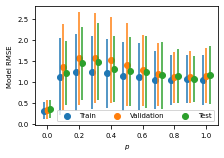

In [3]:
# Figure specs
fig_width_in = 8.3 /2.54  
aspect_ratio = 1.5
fig_height_in = fig_width_in / aspect_ratio
fontsize = 7

# Defining figure
fig, ax = plt.subplots(figsize = (fig_width_in, fig_height_in), sharex = True)


# Defining colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Setting offset so plots don't overlap 
p_offset = 0.02

ps = sorted(df["p"].unique())
labels_added = set()

# Going through each p value 
for m, p in enumerate(ps):
    train_p = p - p_offset

    # Separating out first set of plots to make the legend easier
    if 'Train' not in labels_added:
        ax.scatter(train_p, avgs_train[m], color = colors[0],  label = 'Train')
        ax.errorbar(train_p, avgs_train[m], yerr = stds_train[m], color = colors[0])
        labels_added.add('Train')

    else:
        ax.scatter(train_p, avgs_train[m], color = colors[0])
        ax.errorbar(train_p, avgs_train[m], yerr = stds_train[m], color = colors[0])

    val_p = p
    if 'Validation' not in labels_added:
        ax.scatter(val_p, avgs_val[m], color = colors[1], label = 'Validation')
        ax.errorbar(val_p, avgs_val[m], yerr = stds_val[m], color = colors[1])
        labels_added.add('Validation')
    else:
        ax.scatter(val_p, avgs_val[m], color = colors[1])
        ax.errorbar(val_p, avgs_val[m], yerr = stds_val[m], color = colors[1])

    test_p = p + p_offset
    if 'Test' not in labels_added:
        ax.scatter(test_p, avgs_test[m], color = colors[2], label = 'Test')
        ax.errorbar(test_p, avgs_test[m], yerr = stds_test[m], color = colors[2])
        labels_added.add('Test')
    else:
        ax.scatter(test_p, avgs_test[m], color = colors[2])
        ax.errorbar(test_p, avgs_test[m], yerr = stds_test[m], color = colors[2])

# Setting plot parameters
plt.rcParams.update({'font.size' : fontsize})
plt.xlabel(r'$p$', fontsize = fontsize)
plt.ylabel("Model RMSE" ,fontsize = fontsize)

ax.tick_params(axis = 'x', labelsize = fontsize)
ax.tick_params(axis = 'y', labelsize = fontsize)
plt.legend(ncol = 3, loc = 'lower right')

# Show figure
fig.show()

### Save figure

In [5]:
fig.savefig('error_as_fp_fig_8.pdf', dpi = 600, bbox_inches = 'tight')